In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import scipy.io

# # Path to your .mat file
# file_path = '/content/drive/MyDrive/github/building_data.mat'

# # Load the .mat file
# mat_data = scipy.io.loadmat(file_path)

# # Inspect the keys of the loaded data
# print(mat_data.keys())

# buildingdata = mat_data['buildingdata']

In [5]:
# Check the type and structure of buildingdata
# print(type(buildingdata))
# print(buildingdata.dtype)

In [6]:
# building_names = [f'building{i}' for i in range(1, 10)]  # Adjust based on your actual data

# for building_name in building_names:
#     building_data = buildingdata[building_name]
#     print(f"Data for {building_name}:")
#     print(building_data)


In [7]:
!git clone https://github.com/preeti-me/MVGSL.git

Cloning into 'MVGSL'...
remote: Enumerating objects: 336, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 336 (delta 21), reused 0 (delta 0), pack-reused 290 (from 1)
Receiving objects: 100% (336/336), 5.18 MiB | 25.49 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [8]:
%cd /content/MVGSL

/content/MVGSL


In [9]:
!pip install numpy scipy pandas networkx matplotlib

In [10]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print( "Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print( "Toc: start time not set")

In [11]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.


In [12]:
!pip install --upgrade scipy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [13]:
import numpy as np

def cosine_similarity(vec1, vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)


# Example of Jaccard Similarity

Keys in buildingdata: ('building1', 'building2', 'building3', 'building4', 'building5', 'building6', 'building7', 'building8', 'building9', 'building10')
Room name: ['foyer']
[array(['grandfatherclock'], dtype='<U16') array(['picture'], dtype='<U7')
 array(['chair'], dtype='<U5') array(['carpet'], dtype='<U6')]
Labels for view 0:
Label 0: grandfatherclock
Label 1: picture
Label 2: chair
Label 3: carpet
['grandfatherclock', 'picture', 'chair', 'carpet']
Unique labels: {'chair', 'grandfatherclock', 'carpet', 'picture'}
[[0 0 0 1]
 [0 1 0 0]
 [0 0 1 1]
 [1 0 1 1]]
Shape of extracted matrix: (4, 4)
Edges: [(0, 3), (1, 1), (2, 2), (2, 3), (3, 3)]


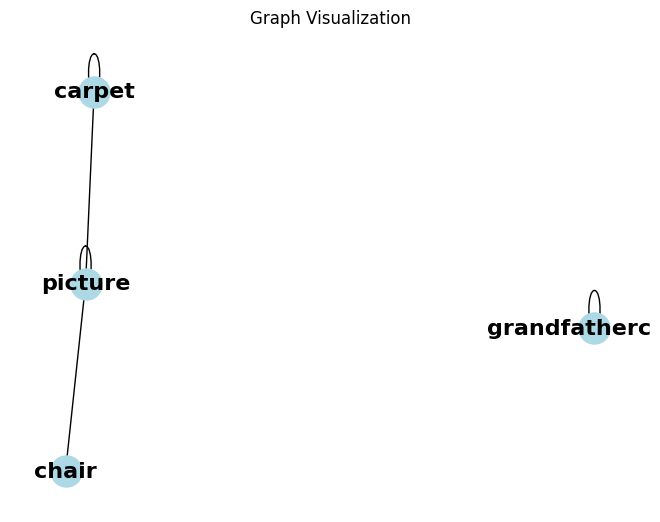

Top Graphs Indices: [0]
Jaccard Similarity: [1.0]


In [14]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy.io

# File paths
embeddings_path = '/content/MVGSL/node2vec-master/emb/'
gt_path = '/content/MVGSL/node2vec-master/node2vec_csv/csv/gt/'
query_path = '/content/MVGSL/node2vec-master/node2vec_csv/csv/query/'

# Load .mat file
file_path = '/content/drive/MyDrive/github/building_data.mat'

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)

buildingdata = mat_data['buildingdata']
# List all keys in buildingdata
print("Keys in buildingdata:", buildingdata.dtype.names)

# Parameters
building_number = 10
rib = 0
view = 0
field_name = f'building{building_number}'

# Extract data
building_info = buildingdata[field_name][0, 0]
# Access the 'rooms' field from the building info
rooms = building_info['rooms'][0]

for room in rooms:
    room_data = room[0]  # Access the first element if room is a structured array

    # Extract the 'name' field or any relevant field
    if 'name' in room_data.dtype.names:
        label = room_data['name'][0]
        print("Room name:", label)


# Access the specific room using the index rib
room_data = rooms[rib][0]

# Extract 'salientobjects' from the room data
salientobjects = room_data['salientobjects'][0]
# Print the structure and size of salientobjects
#print(f"Salientobjects array shape: {salientobjects.shape}")
#print(f"Salientobjects contents: {salientobjects}")

view_data = salientobjects[view][0]
querydata = view_data['labels'][0]
print(querydata)

labels = [item[0] for item in querydata]
#print(labels)

# # Print the labels
print(f"Labels for view {view}:")
for i, label in enumerate(labels):
    print(f"Label {i}: {label}")

# print("Labels for view:")
# for i, label in enumerate(querydata):
#     print(f"Label {i}: {label[0]}")

########

import numpy as np

# Convert numpy arrays to lists or directly to strings
labels = [label.tolist()[0] if isinstance(label, np.ndarray) else label for label in labels]
print(labels)

# Finding unique labels
unique_labels = set(labels)
print(f"Unique labels: {unique_labels}")


querynodes = unique_labels

# Graph construction
qmatrix = rooms[rib]['newadjacencyMatrix'][view]
#print(qmatrix)  ##queryadj[0]: Contains two matrices. The first is a 4x4 matrix, and the second is a 1x1 matrix.
                  #queryadj[1]: Contains two matrices. The first is a 6x6 matrix, and the second is a 6x6 matrix.
                  #queryadj[2]: Contains one matrix, which is a 3x3 matrix.

queryadj = qmatrix[view][0]
queryadj = queryadj[0]
print(queryadj)

# Check the shape of the extracted matrix
print("Shape of extracted matrix:", queryadj.shape)

querygraph = nx.from_numpy_array(queryadj)
#print("Nodes:", querygraph.nodes())
print("Edges:", querygraph.edges())

mapping = {i: label for i, label in enumerate(querynodes)}

# Relabel nodes in the graph
querygraph = nx.relabel_nodes(querygraph, mapping)


# # Visualize the graph (optional)
import matplotlib.pyplot as plt

pos = nx.spring_layout(querygraph)  # Compute node positions
nx.draw(querygraph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=16, font_weight='bold')

plt.title('Graph Visualization')
plt.show()

###############################################################################

#tic()

# Compute Jaccard Similarity
jaccard_similarity = []

all_labels = labels


intersection = len(set(querynodes).intersection(set(all_labels)))
union = len(set(querynodes).union(set(all_labels)))
jaccard_similarity.append(intersection / union)

# Find top graphs
topN = len(jaccard_similarity)
threshold = 6 * max(jaccard_similarity) / 10
top_indices = [i for i, val in enumerate(jaccard_similarity) if val > threshold]

# Sort indices based on their Jaccard similarity values
top_graphs_indices = sorted(top_indices, key=lambda i: jaccard_similarity[i], reverse=True)
#toc()
# Print results
print("Top Graphs Indices:", top_graphs_indices)
print("Jaccard Similarity:", jaccard_similarity)

# Example of Node Alignment and Similarity Calculation

In [15]:

# Example of reading embeddings
rib = 0
view = 0
rib=rib +1
view=view+1
gt_file = f'{gt_path}/b{building_number}r{rib}.edge_list_embeddings.csv'
gt_table = pd.read_csv(gt_file)

query_file = f'{query_path}/b{building_number}r{rib}view{view}.edge_list_embeddings.csv'
query_table = pd.read_csv(query_file)

# Extract node and embedding information
gt_nodes = gt_table['Node'].tolist()
gt_embeddings = gt_table.iloc[:, 1:].values

query_nodes = query_table['Node'].tolist()
query_embeddings = query_table.iloc[:, 1:].values

#######################


# Sort gt_table and query_table based on their respective node lists
gt_sorted_idx = np.argsort(gt_nodes)
gt_table_sorted = gt_table.iloc[gt_sorted_idx]
gt_embeddings_sorted = gt_table_sorted.iloc[:, 1:].values  # Convert to numpy array

query_sorted_idx = np.argsort(query_nodes)
query_table_sorted = query_table.iloc[query_sorted_idx]
query_embeddings_sorted = query_table_sorted.iloc[:, 1:].values  # Convert to numpy array

# Initialize similarity matrices
similarity = np.zeros((len(query_nodes), len(gt_nodes)))
cosSimilarities = np.zeros((len(query_nodes), len(gt_nodes)))

# Compute cosine similarities
for gi in range(len(query_nodes)):
    for gj in range(len(gt_nodes)):
        if query_nodes[gi] == gt_nodes[gj]:
            que = query_embeddings_sorted[gi, :]
            gte = gt_embeddings_sorted[gj, :]
            cosSimilarities[gi, gj] = 1 - cosine_similarity(que, gte)  # 1 - cosine distance gives cosine similarity

    # Find the index of the maximum cosine similarity
    idx = np.argmax(cosSimilarities[gi, :])
    similarity[gi, idx] = 1

    # Create node_mapping
    node_mapping = np.zeros((len(query_nodes), 2), dtype=int)
    node_mapping[gi, 0] = gi
    node_mapping[gi, 1] = idx
toc()
# Print node_mapping
print("Node Mapping (Query Index -> GT Index):")
for i in range(node_mapping.shape[0]):
    print(f"Query Node Index {node_mapping[i, 0]} -> GT Node Index {node_mapping[i, 1]}")


Toc: start time not set
Node Mapping (Query Index -> GT Index):
Query Node Index 0 -> GT Node Index 0
Query Node Index 0 -> GT Node Index 0
Query Node Index 0 -> GT Node Index 0
Query Node Index 3 -> GT Node Index 0


In [16]:
import scipy.io

# Load the .mat file
file_path = '/content/drive/MyDrive/github/building_data.mat'
mat_data = scipy.io.loadmat(file_path)

buildingdata = mat_data['buildingdata']

# Parameters
building_number = 10
field_name = f'building{building_number}'

# Extract data
building_info = buildingdata[field_name][0, 0]
rooms = building_info['rooms'][0]

# Ensure rooms is a numpy array
if isinstance(rooms, np.ndarray):
    # Iterate over each room and print its 'name'
    for i, room in enumerate(rooms):
        # Access the 'name' field of the room struct
        room_name = room['name'][0]
        print(f"Room {i} name: {room_name}")


Room 0 name: [array(['foyer'], dtype='<U5') array(['bedroom'], dtype='<U7')
 array(['kitchen'], dtype='<U7')]
